# Handling Graphs with NetworkX

Python offers the library NetworkX for manipulating graphs. You can learn more here: 

http://networkx.readthedocs.io/en/networkx-1.11/

http://networkx.readthedocs.io/en/networkx-1.11/tutorial/index.html

In [1]:
import networkx as nx
%matplotlib inline

In [2]:
#Creating a graph
G = nx.Graph()

#Add nodes to the graph
G.add_node(1)
G.add_nodes_from([2,3])
G.add_node('Alice')
G.add_node('Bob')
print(G.nodes())

[1, 2, 3, 'Bob', 'Alice']


In [4]:
#add edges to the graph
G.add_edge(1,2)
G.add_edges_from([(1,3),('Alice','Bob')])
e = (1,'Alice')
G.add_edge(*e)

# adding an edge with a new node will create the node Charlie in the graph
G.add_edge('Alice','Charlie')
print(G.edges())
print(G.nodes())

[(1, 2), (1, 3), (1, 'Alice'), ('Bob', 'Alice'), ('Alice', 'Charlie')]
[1, 2, 3, 'Bob', 'Alice', 'Charlie']


In [7]:
#A graph is a dictionary with nodes as the keys
#Each node is a dictionary with the neighbors as the keys, and the edge properties as values
G[1]
#G.node[1]

{2: {}, 3: {}, 'Alice': {}}

In [28]:
#Creating a graph from edges
G2 = nx.Graph()
G2.add_edges_from([(1,2),(1,3),('Alice','Bob'),(1,'Alice')])
print(G2.nodes())
print(G2.edges())

[1, 2, 3, 'Alice', 'Bob']
[(1, 2), (1, 3), (1, 'Alice'), ('Alice', 'Bob')]


In [29]:
G2.remove_edge(1,3)
G2.remove_node(3)
G2.nodes()

[1, 2, 3, 'Alice', 'Bob']

Reading a graph from a file

http://networkx.readthedocs.io/en/networkx-1.11/reference/readwrite.html

In [11]:
#Read a graph from a list of edges
G3 = nx.read_edgelist('graph_edges.txt')
print(G3.nodes())
print(G3.edges())

['1', '2', '3', 'Charlie', 'Bob', 'Alice']
[('1', '2'), ('1', '3'), ('1', 'Alice'), ('2', '3'), ('Charlie', 'Bob'), ('Bob', 'Alice')]


You can also assign properties and values to the nodes and edges of the graph

In [12]:
G3.node['Alice']['gender'] = 'female'
G3.node['Bob']['gender'] = 'male'
G3.node['Charlie']['gender'] = 'male'
G3.node['1']['value'] = 1
G3.node['2']['value'] = -1
G3.node['3']['value'] = 0
for n in G3.nodes():
    print(G3.node[n])

G3.node['Alice']['value'] = 1
G3.node['Bob']['value'] = -1
G3.node['Charlie']['value'] = 1
for n in G3.nodes():
    print(n+ ":" + str(G3.node[n]['value']))

for n in G3.nodes():
    print(n,G3.node[n])


{'value': 1}
{'value': -1}
{'value': 0}
{'gender': 'male'}
{'gender': 'male'}
{'gender': 'female'}
1:1
2:-1
3:0
Charlie:1
Bob:-1
Alice:1
1 {'value': 1}
2 {'value': -1}
3 {'value': 0}
Charlie {'gender': 'male', 'value': 1}
Bob {'gender': 'male', 'value': -1}
Alice {'gender': 'female', 'value': 1}


In [13]:
G3.edge['Alice']['Bob']['label'] = 10
print(G3.edge['Bob']['Alice'])
print(G3['Alice'])
print(G3['Bob'])

{'label': 10}
{'1': {}, 'Bob': {'label': 10}}
{'Charlie': {}, 'Alice': {'label': 10}}


A special attribute of a an edge is the "weight". When adding weighted edges, you enter triples consisting of the two edge endpoints and the weight of the edge. This weight is stored in an attribute "weight" by default.

In [7]:
G4 = nx.Graph()
G4.add_weighted_edges_from([(1,2,0.5),(2,3,0.1),(3,4,0.7)])
for (a,b) in G4.edges():
    print (G4.edge[a][b])
for (a,b,w) in G4.edges(data =True): #data=True returns weight as well
    print (str(a)+" "+ str(b) + " " + str(w['weight']))
for n in G4:
    print(G4[n])

{'weight': 0.5}
{'weight': 0.1}
{'weight': 0.7}
1 2 0.5
2 3 0.1
3 4 0.7
{2: {'weight': 0.5}}
{1: {'weight': 0.5}, 3: {'weight': 0.1}}
{2: {'weight': 0.1}, 4: {'weight': 0.7}}
{3: {'weight': 0.7}}


### Directed Graphs ###

In [5]:
DG=nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5), (3,1,0.75), (1,4,0.1)])
print(DG.edges())

[(1, 2), (1, 4), (3, 1)]


### Graph Operations ###

Some common graph operations and algorithms are implemented in networkx library.

http://networkx.readthedocs.io/en/networkx-1.11/reference/algorithms.html

Neighbors, degrees and adjancency matrix

In [8]:
print(G.neighbors(1)) # returns the neighbors of a node
print(G.degree(1)) # returns the degree of a node
print(G4.degree(3, weight='weight'))
print(G4.degree(3))
A = nx.adjacency_matrix(G)
print(A) 
#the adjacency matrix is stored as a sparse matrix
print(type(A))

[2, 3, 'Alice']
3
0.7999999999999999
2
  (0, 1)	1
  (0, 2)	1
  (0, 4)	1
  (1, 0)	1
  (2, 0)	1
  (3, 4)	1
  (4, 0)	1
  (4, 3)	1
  (4, 5)	1
  (5, 4)	1
<class 'scipy.sparse.csr.csr_matrix'>


Neighbors and degrees for directed or weighted graphs

In [39]:
print(DG.successors(1))
print(DG.neighbors(1))
print(DG.predecessors(1))
print(DG.out_degree(1,weight='weight'))
print(DG.out_degree(1))
print(DG.in_degree(1))

[2, 4]
[2, 4]
[3]
0.6
2
1


Connected components

In [20]:
G3.add_edge('1','Alice')
G3.remove_edge('1','Alice') #you can also remove_node, or a list of nodes or edges (remove_nodes_from, remove_edges_from)
G3.add_edge('Alice','Charlie')
print(nx.number_connected_components(G3))
C = nx.connected_components(G3)
for GC in nx.connected_component_subgraphs(G3):
    print(GC.nodes())
    print(GC.edges())
for c in C:
    print(c)
#CL = nx.max_clique(G3)

2
['1', '2', '3']
[('1', '2'), ('1', '3'), ('2', '3')]
['Charlie', 'Bob', 'Alice']
[('Charlie', 'Bob'), ('Charlie', 'Alice'), ('Bob', 'Alice')]
['1', '2', '3']
['Charlie', 'Bob', 'Alice']


Shortest paths

In [21]:
G3.add_edge('1','Alice')
sp = nx.shortest_path(G3,'3','Bob')
print(sp)
print(len(sp)-1)
print(nx.shortest_path_length(G3,'3','Bob'))

SP1 = nx.single_source_shortest_path(G3,'1')
#print(SP1)
#print(nx.single_source_shortest_path_length(G3,'1'))
SP = nx.all_pairs_shortest_path(G3)
print(SP)
print(SP['1']['Bob'])

['3', '1', 'Alice', 'Bob']
3
3
{'1': {'1': ['1'], '2': ['1', '2'], '3': ['1', '3'], 'Charlie': ['1', 'Alice', 'Charlie'], 'Bob': ['1', 'Alice', 'Bob'], 'Alice': ['1', 'Alice']}, '2': {'2': ['2'], '1': ['2', '1'], '3': ['2', '3'], 'Charlie': ['2', '1', 'Alice', 'Charlie'], 'Bob': ['2', '1', 'Alice', 'Bob'], 'Alice': ['2', '1', 'Alice']}, '3': {'1': ['3', '1'], '2': ['3', '2'], '3': ['3'], 'Charlie': ['3', '1', 'Alice', 'Charlie'], 'Bob': ['3', '1', 'Alice', 'Bob'], 'Alice': ['3', '1', 'Alice']}, 'Charlie': {'1': ['Charlie', 'Alice', '1'], '2': ['Charlie', 'Alice', '1', '2'], '3': ['Charlie', 'Alice', '1', '3'], 'Charlie': ['Charlie'], 'Bob': ['Charlie', 'Bob'], 'Alice': ['Charlie', 'Alice']}, 'Bob': {'1': ['Bob', 'Alice', '1'], '2': ['Bob', 'Alice', '1', '2'], '3': ['Bob', 'Alice', '1', '3'], 'Charlie': ['Bob', 'Charlie'], 'Bob': ['Bob'], 'Alice': ['Bob', 'Alice']}, 'Alice': {'1': ['Alice', '1'], '2': ['Alice', '1', '2'], '3': ['Alice', '1', '3'], 'Charlie': ['Alice', 'Charlie'], 'Bob':

Link Analysis

In [47]:
DG2 = nx.DiGraph()
DG2.add_edges_from([(1,2),(1,3),(3,2),(2,5),(4,1),(4,2),(4,3),(5,1),(5,4)])
pr = nx.pagerank(DG2)
print(pr)
[h,a] = nx.hits(DG2)
print(h)
print(a)
print(a[2])

pr = nx.pagerank(G3)
print(pr)

{1: 0.18064505060873787, 2: 0.2713164308772404, 3: 0.14665711544131715, 4: 0.14076233474848301, 5: 0.26061906832422166}
{1: 0.3028419086392418, 2: 1.3109311069706554e-15, 3: 0.1674519922094525, 4: 0.40426487170689396, 5: 0.1254412274444104}
{1: 0.23681288036482923, 2: 0.3909843234563998, 3: 0.31612245503718484, 4: 0.05608034114158294, 5: 3.06089826220615e-15}
0.3909843234563998
{'3': 0.1459853777760842, '2': 0.1459853777760842, '1': 0.20802924444783155, 'Bob': 0.14598537777608417, 'Charlie': 0.14598537777608417, 'Alice': 0.2080292444478315}


Betweeness

In [22]:
BC = nx.edge_betweenness_centrality(G3)
print(BC)

{('1', 'Alice'): 0.6, ('Charlie', 'Alice'): 0.26666666666666666, ('1', '2'): 0.26666666666666666, ('Charlie', 'Bob'): 0.06666666666666667, ('2', '3'): 0.06666666666666667, ('Bob', 'Alice'): 0.26666666666666666, ('1', '3'): 0.26666666666666666}


### Drawing Graphs ###

http://networkx.readthedocs.io/en/networkx-1.11/reference/drawing.html

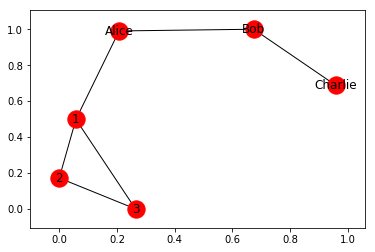

In [14]:
nx.draw_networkx(G3)

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:137: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


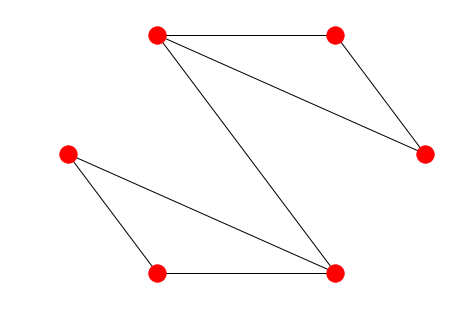

In [49]:
nx.draw_circular(G3)

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:137: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


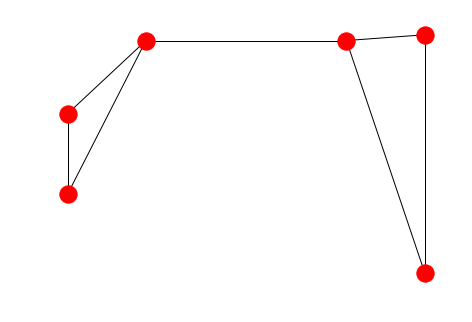

In [50]:
nx.draw_spectral(G3)

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:137: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


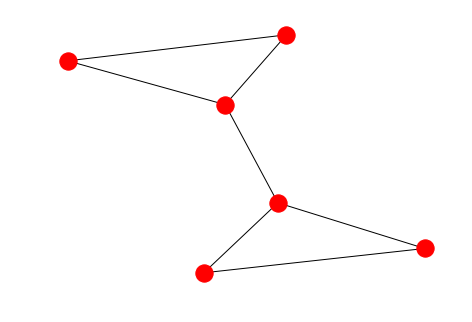

In [51]:
nx.draw_spring(G3)

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:137: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


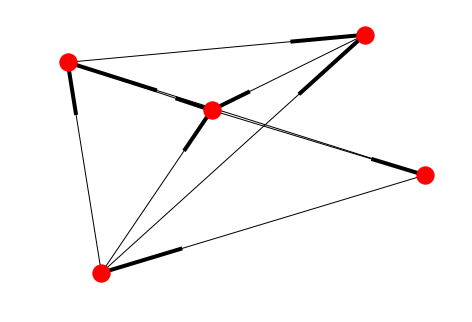

In [52]:
nx.draw_spring(DG2)

### An example ###

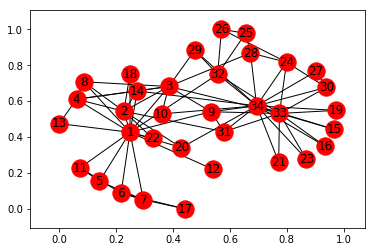

In [55]:
karate=nx.read_gml("karate.gml")
nx.draw_networkx(karate)

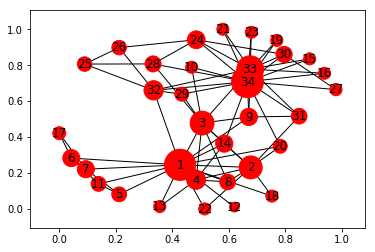

In [54]:
pr = nx.pagerank(karate)
nx.draw_networkx(karate,node_size=[10000*v for v in pr.values()])